## Recurrent Neural Network

### $ h_t=f_W\left( h_{t-1},x_t \right) $
* $h_t$: new state
* $f_W$: some function with parameters W
* $h_{t-1}$: old state
* $x_t$: input vector at some time step

### $ h_t=tanh(W_{hh} h_{t-1}+W_{xh} x_t) $
### $ y_t=W_{hy}h_t$
Given list of word vectors: 
#### $ x_1,\cdots,x_{t-1},x_t,x_{t+1},\cdots, x_T $ <br>
At a single time step:
#### $ h_t = \sigma(W^{(hh)}h_{t-1}+W^{(hx)}x_t)$
#### $ \hat{y}_t = softmax(W^{(S)}h_t)$
#### $ \hat{P}(x_{t+1}=v_j  \big|  x_t,\cdots,x_1) = \hat{y}_{t,j}$

### RNN applications
* Language Modeling
* Speech Recognition
* Machine Translation
* Conversation Modeling / Question Answering
* Image/Video Caption
* Image/Music/Dance Generation

### RNN model
* **one to one** <br>
o<br>
$\uparrow$<br>
o<br>
$\uparrow$<br>
o<br>
_**Vanilla Neural Networks**_


* **one to many** <br>
o&emsp; o&emsp;o<br>
$\uparrow$&emsp;$\uparrow$&emsp;$\uparrow$<br>
o$\rightarrow$o$\rightarrow$o<br>
$\uparrow$<br>
o<br>
_**Image Caption(image -> sequence of words)**_


* **many to one** <br>
&emsp;&emsp;&emsp; o<br>
&emsp;&emsp;&emsp; $\uparrow$<br>
o$\rightarrow$o$\rightarrow$o<br>
$\uparrow$&emsp;$\uparrow$&emsp;$\uparrow$<br>
o&emsp; o&emsp;o<br>
_**Sentiment Classification(sequence of word -> sentiment)**_


* **many to many** <br>
&emsp;&emsp;&emsp; o&emsp; o&emsp;o<br>
&emsp;&emsp;&emsp; $\uparrow$&emsp;$\uparrow$&emsp;$\uparrow$<br>
o$\rightarrow$o$\rightarrow$o$\rightarrow$o$\rightarrow$o<br>
$\uparrow$&emsp;$\uparrow$&emsp;$\uparrow$<br>
o&emsp; o&emsp;o<br>
_**Machine Translation(seq of words -> seq of words)**_


* **many to many** <br>
o&emsp; o&emsp;o<br>
$\uparrow$&emsp;$\uparrow$&emsp;$\uparrow$<br>
o$\rightarrow$o$\rightarrow$o<br>
$\uparrow$&emsp;$\uparrow$&emsp;$\uparrow$<br>
o&emsp; o&emsp;o<br>
_**Viedeo Classification on frame level**_<br>

## RNN in TensorFlow
** cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size) ** <br>
** ... ** <br>
** outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32) **

### One node: 4 (input-dim) in 2 (hidden_size)

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn
import pprint

pp = pprint.PrettyPrinter(indent=4)
sess = tf.InteractiveSession()

In [3]:
# One cell RNN input_dim(4) -> output_dim(2)
hidden_size = 2
cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)

x_data = np.array([[[1,0,0,0]]], dtype=np.float32)
outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)

sess.run(tf.global_variables_initializer())
pp.pprint(outputs.eval())

array([[[-0.08001683,  0.45310327]]], dtype=float32)


In [9]:
print('x_data shape:', x_data.shape)
print('outputs shape:', outputs.shape)
print('_states shape:', _states.shape)

x_data shape: (1, 1, 4)
outputs shape: (1, 1, 2)
_states shape: (1, 2)


### Unfolding to n sequences

In [4]:
h = [1,0,0,0]
e = [0,1,0,0]
l = [0,0,1,0]
o = [0,0,0,1]

In [15]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5
with tf.variable_scope('two_sequences') as scope:
    hidden_size = 2
    cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)
    x_data = np.array([[h,e,l,l,o]], dtype=np.float32)
    print('x_data shape', x_data.shape)
    pp.pprint(x_data)

    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())


x_data shape (1, 5, 4)
array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]], dtype=float32)
array([[[-0.49420902,  0.17901635],
        [ 0.2452183 ,  0.55110466],
        [ 0.05953445,  0.3627868 ],
        [ 0.12062177,  0.37141174],
        [ 0.27782634,  0.31537586]]], dtype=float32)


### Batching input

In [5]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 batchs: 'hello', 'eolll', 'lleel'
# tf.reset_default_graph()
with tf.variable_scope('3_batches') as scope:
    x_data = np.array([[h,e,l,l,o],
                      [e,o,l,l,l],
                      [l,l,e,e,l]], dtype=np.float32)
    print('x_data shape:', x_data.shape)
    pp.pprint(x_data)

    # LSTM
    cell = tf.nn.rnn_cell.LSTMCell(num_units=2, state_is_tuple=True)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)

    sess.run(tf.global_variables_initializer())
    print('outputs shape:', outputs.shape)
    print('_states', _states)
    pp.pprint(outputs.eval())

x_data shape: (3, 5, 4)
array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
outputs shape: (3, 5, 2)
_states LSTMStateTuple(c=<tf.Tensor '3_batches_1/rnn/while/Exit_3:0' shape=(3, 2) dtype=float32>, h=<tf.Tensor '3_batches_1/rnn/while/Exit_4:0' shape=(3, 2) dtype=float32>)
array([[[-0.00593202, -0.05310498],
        [-0.03151539,  0.01563764],
        [ 0.09951049, -0.0167137 ],
        [ 0.19045909, -0.02486248],
        [ 0.35020858,  0.06548664]],

       [[-0.02150788,  0.04751204],
        [ 0.12529035,  0.09331957],
        [ 0.19575039,  0.04861573],
        [ 0.26119316,  0.03596565],
        [ 0.30202186,  0.03472035]],

   

## Teach RNN 'hihello'
### One-hot encoding

### Creating RNN cell
** rnn_cell = rnn_cell.BasicRNNCell(rnn_size) **<br>
** rnn_cell = rnn_cell.BasicLSTMCell(rnn_size) **<br>
** rnn_cell = rnn_cell.GRUCell(rnn_size) **<br>

### Execute RNN
** outputs, _states = tf.nn.dynamic_rnn(rnn_cell, X, initial_state=initial_state, dtype=tf.float32) **

### RNN parameters
* hidden_size (output from the LSTM)
* input_dim (one-hot size)
* batch_size (one sentence)
* sequence_length (word length)

In [28]:
idx2char = ['h','i','e','l','o']
# Teach hello: hihell -> ihello
x_data = [[0,1,0,2,3,3]] # hihell
x_one_hot = [[[1,0,0,0,0], # h 0
             [0,1,0,0,0], # i 1
             [1,0,0,0,0], # h 0
             [0,0,1,0,0], # e 2
             [0,0,0,1,0], # l 3
             [0,0,0,1,0]]] # l 3
y_data = [[1,0,2,3,3,4]] # ihello

num_classes = 5
input_dim = 5 # ont-hot size
hidden_size = 1 # output from the LST. 5 to directly predict one-hot
batch_size = 1 # one sentence
sequence_length = 6 # |ihello|==6
learning_rate = 0.1 

with tf.variable_scope('LSTM_') as scope:
    X = tf.placeholder(tf.float32, [None, sequence_length, input_dim]) # X one-hot
    Y = tf.placeholder(tf.int32, [None, sequence_length]) # Y label

    cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
    initial_state = cell.zero_state(batch_size, tf.float32)
    outputs, _states = tf.nn.dynamic_rnn(cell, X, initial_state=initial_state, dtype=tf.float32)
    pp.pprint(outputs)

    # FC layer
    X_for_FC = tf.reshape(outputs, [-1, hidden_size])
    outputs = tf.contrib.layers.fully_connected(inputs=X_for_FC, num_outputs=num_classes, activation_fn=None)
    # reshape out for sequence_loss
    outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

    weights = tf.ones([batch_size, sequence_length])
    sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
    loss = tf.reduce_mean(sequence_loss)
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

    predictation = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    loss_list = []
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        l, _ = sess.run([loss, train], feed_dict={X:x_one_hot, Y:y_data})
        result = sess.run(predictation, feed_dict={X:x_one_hot})
        loss_list.append(l)
        print(i+1, "loss:", l, "prediction: ", result, "true Y:", y_data)
        
        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print("\tPrediction str: ", ''.join(result_str))

<tf.Tensor 'LSTM_/rnn/transpose_1:0' shape=(1, 6, 1) dtype=float32>
1 loss: 1.6241821 prediction:  [[3 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
2 loss: 1.5756569 prediction:  [[3 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
3 loss: 1.545483 prediction:  [[3 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
4 loss: 1.5228895 prediction:  [[3 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
5 loss: 1.5023115 prediction:  [[3 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
6 loss: 1.4780033 prediction:  [[3 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
7 loss: 1.4459319 prediction:  [[3 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
8 loss: 1.4041374 prediction:  [[3 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
9 loss: 1.3533577 prediction:  [[3 3 3 3 3 3]] true Y: [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
10 loss: 1.2962596 predi

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

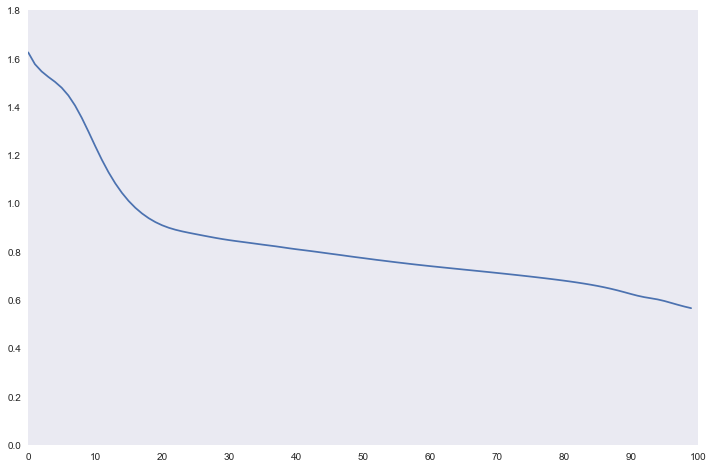

In [41]:
plt.figure(figsize=(12,8))
plt.axis([0,100,0,1.8])
plt.xticks(np.arange(0,101,10))
plt.grid()
plt.plot(loss_list)

## RNN with long sequences
### Manual data creation

In [ ]:
idx2char = ['h','i','e','l','o']
x_

## RNN with time series data (stock)

In [43]:
def MinMaxScaler(data):
    d1 = data - np.min(data,0)
    d2 = np.max(data,0) - np.min(data,0)
    return d1/(d2 + 1e-7)

timesteps = seq_length = 7
data_dim = 5
output_dim = 1

xy = np.loadtxt('Data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]

dataX = []
dataY = []
for i in range(0, len(y)-seq_length):
    _x = x[i:i+seq_length]
    _y = y[i+seq_length]
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)
    
# split to train and testing
train_size = int(len(dataY)*0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.3641

 [0.28660426 0.29142392 0.27712388 0.35907502 0.29882004]] -> [0.28246982]
[[0.22514527 0.24532174 0.24607805 0.14464462 0.25248011]
 [0.25629719 0.25792404 0.26547442 0.16546563 0.26906329]
 [0.26544756 0.25964371 0.26116078 0.14476114 0.26880108]
 [0.27203358 0.26714434 0.27771079 0.12451376 0.26262241]
 [0.24735086 0.24572631 0.2378324  0.2696603  0.23659616]
 [0.28660426 0.29142392 0.27712388 0.35907502 0.29882004]
 [0.28296159 0.2844869  0.28661069 0.18411759 0.28246982]] -> [0.29782917]
[[0.25629719 0.25792404 0.26547442 0.16546563 0.26906329]
 [0.26544756 0.25964371 0.26116078 0.14476114 0.26880108]
 [0.27203358 0.26714434 0.27771079 0.12451376 0.26262241]
 [0.24735086 0.24572631 0.2378324  0.2696603  0.23659616]
 [0.28660426 0.29142392 0.27712388 0.35907502 0.29882004]
 [0.28296159 0.2844869  0.28661069 0.18411759 0.28246982]
 [0.27995992 0.29966171 0.30235971 0.15158197 0.29782917]] -> [0.30144301]
[[0.26544756 0.25964371 0.26116078 0.14476114 0.26880108]
 [0.27203358 0.267144

 [0.10272295 0.11450115 0.12339107 0.11579278 0.12022156]] -> [0.09180565]
[[0.13515704 0.13288424 0.14064544 0.13891727 0.14056467]
 [0.13882896 0.13386711 0.14598599 0.12561621 0.13832038]
 [0.12752213 0.13898311 0.14598599 0.14675988 0.13587239]
 [0.12122754 0.12022427 0.11893681 0.23269696 0.11028333]
 [0.09922599 0.1120155  0.10464033 0.20712557 0.11652032]
 [0.10272295 0.11450115 0.12339107 0.11579278 0.12022156]
 [0.09910935 0.09788123 0.09815542 0.19215739 0.09180565]] -> [0.12482645]
[[0.13882896 0.13386711 0.14598599 0.12561621 0.13832038]
 [0.12752213 0.13898311 0.14598599 0.14675988 0.13587239]
 [0.12122754 0.12022427 0.11893681 0.23269696 0.11028333]
 [0.09922599 0.1120155  0.10464033 0.20712557 0.11652032]
 [0.10272295 0.11450115 0.12339107 0.11579278 0.12022156]
 [0.09910935 0.09788123 0.09815542 0.19215739 0.09180565]
 [0.09019209 0.11594643 0.10839633 0.14979833 0.12482645]] -> [0.12071709]
[[0.12752213 0.13898311 0.14598599 0.14675988 0.13587239]
 [0.12122754 0.120224

 [0.89853061 0.89608976 0.91789617 0.13018733 0.90038407]] -> [0.89994701]
[[0.99096632 1.         0.97678915 0.26386125 0.96397742]
 [0.93253824 0.92453146 0.91622355 0.28869768 0.90280311]
 [0.88066709 0.88236031 0.88899262 0.19141346 0.88668611]
 [0.88888491 0.88218689 0.8909586  0.18063996 0.88349487]
 [0.87174992 0.88655144 0.89333544 0.13604912 0.89175741]
 [0.89853061 0.89608976 0.91789617 0.13018733 0.90038407]
 [0.88894325 0.88357424 0.90287217 0.10453527 0.89994701]] -> [0.91635521]
[[0.93253824 0.92453146 0.91622355 0.28869768 0.90280311]
 [0.88066709 0.88236031 0.88899262 0.19141346 0.88668611]
 [0.88888491 0.88218689 0.8909586  0.18063996 0.88349487]
 [0.87174992 0.88655144 0.89333544 0.13604912 0.89175741]
 [0.89853061 0.89608976 0.91789617 0.13018733 0.90038407]
 [0.88894325 0.88357424 0.90287217 0.10453527 0.89994701]
 [0.90144472 0.9090966  0.92203374 0.11000269 0.91635521]] -> [0.92046468]
[[0.88066709 0.88236031 0.88899262 0.19141346 0.88668611]
 [0.88888491 0.882186

In [59]:
# input placeholders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

with tf.variable_scope('LSTM2') as scope:
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=output_dim, state_is_tuple=True)
    outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
    Y_pred = outputs[:, -1]

    # cost/loss
    loss = tf.reduce_sum(tf.square(Y_pred-Y))
    # optimizer
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train = optimizer.minimize(loss)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    for i in range(5000):
        _, l = sess.run([train, loss], feed_dict={X:trainX, Y:trainY})
        if i%100==0:
            print(i, l)

    testPredict = sess.run(Y_pred, feed_dict={X:testX})

0 94.4263
100 0.7002236
200 0.6716802
300 0.63725966
400 0.61169595
500 0.5958187
600 0.5851893
700 0.5772387
800 0.5707749
900 0.56523657
1000 0.56033623
1100 0.5559115
1200 0.5518612
1300 0.54811716
1400 0.54463094
1500 0.5413657
1600 0.5382931
1700 0.53539085
1800 0.5326402
1900 0.53002614
2000 0.52753544
2100 0.52515703
2200 0.52288175
2300 0.5207007
2400 0.51860714
2500 0.51659405
2600 0.5146559
2700 0.51278746
2800 0.5109844
2900 0.5092421
3000 0.507557
3100 0.5059257
3200 0.5043452
3300 0.5028121
3400 0.5013244
3500 0.49987936
3600 0.49847502
3700 0.497109
3800 0.49577978
3900 0.49448547
4000 0.49322444
4100 0.4919952
4200 0.49079627
4300 0.4896267
4400 0.48848477
4500 0.4873698
4600 0.48628062
4700 0.48521587
4800 0.48417512
4900 0.48315722


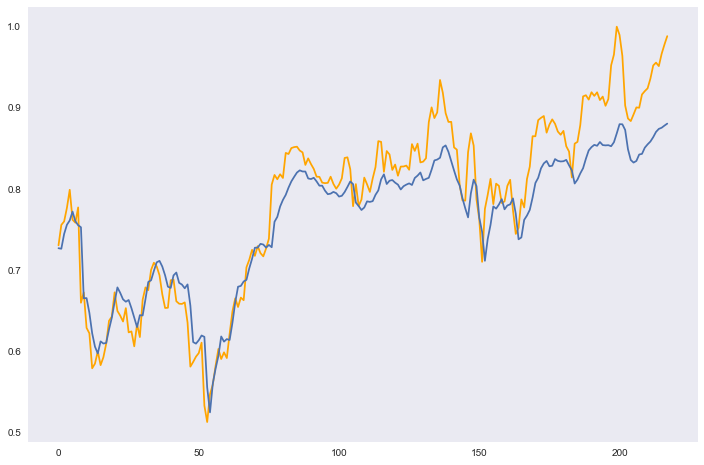

In [60]:
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(testY, 'orange')
plt.plot(testPredict)